[View in Colaboratory](https://colab.research.google.com/github/saranyamandava/Lambda-School-DataScience/blob/master/Week7_AUC_Coding_Challenge_2.ipynb)

# Area-Under-Curve Measurement

Objectives:
* Compute true positive, true negative, false positive, and false negative classification rate
* Adjust classification threshold to control above rates
* Plot AUC  to demonstrate accuracy
* Calculate AUC as a single value

### Background

You want to be familiar with ROC and AUC.

#### Receiver Operating Characteristic Curve (ROC)

[wikipedia](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)
[Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall) [sklearn](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)

#### Area Under Curve (AUC)

[sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html)

The ROC curve provides a visualization of the performance of a classifier, with false-positive rates along the $x$ axis and true-positive rates along the $y$ axis. A perfect classifier produces no false positives (100% specificity) and no false negatives (100% sensitivity). In reality, classifiers are not so discerning.

### Do:

Correct the bugs in the following code blocks in order to work through the mechanics of building an AUC. 

Once you've calculated `FPR` and `TPR` for the Logistic Regression classifier on its Sprint Challenge dataset and visualized the results, modify it to compute the same data using the _test_ data, instead of the _train_ data.

### 1. Compute Linear Regression Model

Create a training set and train a Logistic Regression model with it

In [0]:
import  numpy  as  np
import  pandas  as  pd
from  sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data = pd.read_csv('https://www.dropbox.com/s/bnwfu81bjpf22hp/logistic_regression.csv?raw=1', index_col=0)
# Use train_test_split to create a training set
train_x, test_x, train_y, test_y = train_test_split(data[['x1','x2']],data['y'])

# Create and train(fit) the model
regr = LogisticRegression()
regr.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### 2. Predict values for $\hat{y}$ for the test set

In [0]:
# Predict y_hat for the test set created previously

y_hat = regr.predict(train_x)
print(y_hat)

[1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1.
 1. 0. 1. 0. 1. 1.]


### Observe precision

In [0]:
# True positive: if the prediction is 1, and the original data is 1, their sum is 2
true_positives = (y_hat+train_y)==2
# False positive: if the prediction is 1, but the original data is 0, their difference is 1
false_positives = (y_hat-train_y)==1
print(true_positives.T)
print(false_positives.T)

32     True
37     True
11    False
1     False
35     True
33     True
21     True
8     False
7     False
10    False
12    False
24     True
15    False
16    False
34     True
27     True
17    False
14    False
13    False
38     True
30    False
9     False
36     True
31     True
25     True
5     False
18    False
4     False
26     True
29     True
Name: y, dtype: bool
32    False
37    False
11    False
1     False
35    False
33    False
21    False
8     False
7     False
10    False
12    False
24    False
15    False
16    False
34    False
27    False
17    False
14    False
13    False
38    False
30    False
9     False
36    False
31    False
25    False
5     False
18     True
4     False
26    False
29    False
Name: y, dtype: bool


In [0]:
# The probabilities computed by Logistic Regression:
# The columns correspond with class 0 or 1
proba = regr.predict_proba(train_x)
print(proba)

# The decision function computed by Logistic Regression - this is simply
# \sum w_i x_i + b, before the logit function has been applied
dec = regr.decision_function(train_x)
print(dec)

[[0.01415575 0.98584425]
 [0.0068751  0.9931249 ]
 [0.62670332 0.37329668]
 [0.60028794 0.39971206]
 [0.05506723 0.94493277]
 [0.22651096 0.77348904]
 [0.07912503 0.92087497]
 [0.7826045  0.2173955 ]
 [0.88549305 0.11450695]
 [0.97835222 0.02164778]
 [0.76160757 0.23839243]
 [0.19478912 0.80521088]
 [0.80402277 0.19597723]
 [0.93627303 0.06372697]
 [0.07990297 0.92009703]
 [0.03690859 0.96309141]
 [0.78555107 0.21444893]
 [0.76567721 0.23432279]
 [0.93256947 0.06743053]
 [0.01782394 0.98217606]
 [0.67677756 0.32322244]
 [0.97594312 0.02405688]
 [0.3238595  0.6761405 ]
 [0.25271627 0.74728373]
 [0.00556115 0.99443885]
 [0.96825851 0.03174149]
 [0.27884263 0.72115737]
 [0.74982141 0.25017859]
 [0.01162833 0.98837167]
 [0.03564318 0.96435682]]
[ 4.24337715  4.97295055 -0.51809977 -0.40666499  2.84255893  1.22811814
  2.45429504 -1.28090921 -2.04550912 -3.81096674 -1.16151325  1.41918664
 -1.41162913 -2.68729927  2.44366605  3.26170405 -1.29831383 -1.1840611
 -2.62684574  4.00922786 -0.739

### 2.1 Build ROC curves

In [0]:
thresholds = np.linspace(0.0,1.0,11)
predictions = pd.DataFrame()

for decision_threshold in thresholds:
    decision_threshold = np.round(decision_threshold,2)
    true_false_array = (proba[::,1:2:] > decision_threshold).T[0]
    predictions[str(decision_threshold)] = true_false_array.astype(int)
        
print(predictions)

    0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.0
0     1    1    1    1    1    1    1    1    1    1    0
1     1    1    1    1    1    1    1    1    1    1    0
2     1    1    1    1    0    0    0    0    0    0    0
3     1    1    1    1    0    0    0    0    0    0    0
4     1    1    1    1    1    1    1    1    1    1    0
5     1    1    1    1    1    1    1    1    0    0    0
6     1    1    1    1    1    1    1    1    1    1    0
7     1    1    1    0    0    0    0    0    0    0    0
8     1    1    0    0    0    0    0    0    0    0    0
9     1    0    0    0    0    0    0    0    0    0    0
10    1    1    1    0    0    0    0    0    0    0    0
11    1    1    1    1    1    1    1    1    1    0    0
12    1    1    0    0    0    0    0    0    0    0    0
13    1    0    0    0    0    0    0    0    0    0    0
14    1    1    1    1    1    1    1    1    1    1    0
15    1    1    1    1    1    1    1    1    1    1    0
16    1    1  

### 3. Calculate TP and FP at each discrimination level

False positive rate at threshold 0.1:  0.0
True positive rate at threshold 0.1:  1.0
            0
0.0  1.000000
0.1  0.666667
0.2  0.533333
0.3  0.200000
0.4  0.066667
0.5  0.066667
0.6  0.066667
0.7  0.066667
0.8  0.000000
0.9  0.000000
1.0  0.000000
            0
0.0  1.000000
0.1  1.000000
0.2  1.000000
0.3  1.000000
0.4  0.933333
0.5  0.933333
0.6  0.933333
0.7  0.866667
0.8  0.733333
0.9  0.666667
1.0  0.000000


Text(0.5,1,'Receiver operating characteristic example')

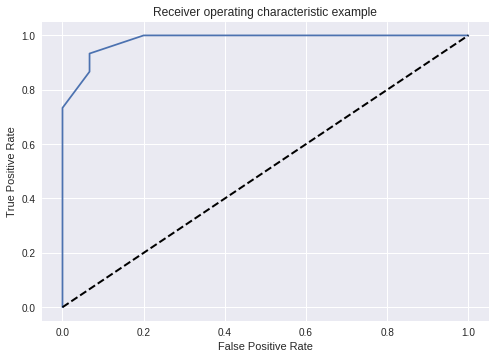

In [0]:
# Base case:
false_positives = np.sum(predictions['0.1']-train_y.values == 1)
true_positives = np.sum(predictions['0.1']+train_y.values==2)
print('False positive rate at threshold 0.1: ',false_positives/np.sum(train_y==0))
print('True positive rate at threshold 0.1: ',true_positives/np.sum(train_y==1))

# Now automate the base case across the set of all decision thresholds
fp = pd.DataFrame()
tp = pd.DataFrame()
for threshold in predictions.columns:
    fp[threshold] = [np.sum(predictions[threshold]-train_y.values==1)/np.sum(train_y==0)]
    tp[threshold] = [np.sum(predictions[threshold]+train_y.values==2)/np.sum(train_y==1)]

# The false positives and true positive rated, based on the sliding decision threshold
print(fp.T)
print(tp.T)

import matplotlib.pyplot as plt
plt.plot(fp.T,tp.T);
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
    

### 4. Example using sklearn

In [0]:
from sklearn import metrics

0.9822222222222222
0.9822222222222223
[0.         0.         0.06666667 0.06666667 0.2        0.2
 1.        ]
[0.06666667 0.86666667 0.86666667 0.93333333 0.93333333 1.
 1.        ]


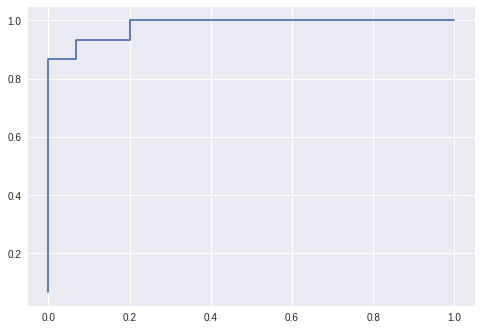

In [0]:
# The Area-Under-The-Curve Score
print(metrics.auc(fp.T,tp.T))
print(metrics.roc_auc_score(train_y.values,proba[::,1:2:]))

# Producing the same false/true positive data via a library and plotting it
fpr, tpr, _ = metrics.roc_curve(train_y.values,proba[::,1:2:])
print(fpr)
print(tpr)
plt.plot(fpr,tpr);

## Do

### 5. Compute the ROC and AUC using the _testset_ instead of the _trainset_


AUC: 0.9600000000000001


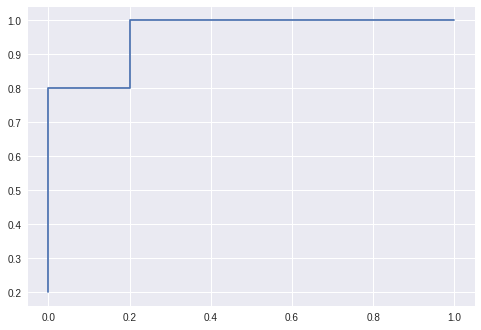

In [0]:
# Compute and plot

# Compute and plot# Comput 
proba = regr.predict_proba(test_x)

fpr, tpr, _ = metrics.roc_curve(test_y.values,proba[::,1:2:])

print('AUC:', metrics.auc(fpr.T,tpr.T))

plt.plot(fpr,tpr);